In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
pd.options.mode.chained_assignment = None

In [18]:
# download the stocks-file (in my case it is GOOGL from 04.2023 to 04.2024):
# link: https://www.dropbox.com/scl/fi/sq5v0a0lsiozz789ymy8u/GOOGL.csv?rlkey=hzahwy73vboaao7dkwr9sdky8&st=c552qj2f&dl=0
# uncomment the following line to download the file:
# !wget -O GOOGL.csv https://www.dropbox.com/scl/fi/sq5v0a0lsiozz789ymy8u/GOOGL.csv?rlkey=hzahwy73vboaao7dkwr9sdky8&st=c552qj2f&dl=0

--2024-05-05 13:35:02--  https://www.dropbox.com/scl/fi/sq5v0a0lsiozz789ymy8u/GOOGL.csv?rlkey=hzahwy73vboaao7dkwr9sdky8
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf453d8a350838fa0845a596412.dl.dropboxusercontent.com/cd/0/inline/CSViZNZ3_E46D8J-nK5Ppl3oEh9v9naofKJuvbCbg8sydpcp9vCisc1Gkqc24sO2yCV9FFhtRluNBYckI9SnGn2tm4dDYX9cpXkHfpku-SZbsme8RrGM-6GVMMf5RVXUH7GjptmVxDb7N0P_RZgD7Xuk/file# [following]
--2024-05-05 13:35:02--  https://ucf453d8a350838fa0845a596412.dl.dropboxusercontent.com/cd/0/inline/CSViZNZ3_E46D8J-nK5Ppl3oEh9v9naofKJuvbCbg8sydpcp9vCisc1Gkqc24sO2yCV9FFhtRluNBYckI9SnGn2tm4dDYX9cpXkHfpku-SZbsme8RrGM-6GVMMf5RVXUH7GjptmVxDb7N0P_RZgD7Xuk/file
Resolving ucf453d8a350838fa0845a596412.dl.dropboxusercontent.com (ucf453d8a350838fa0845a596412.dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:

In [19]:
# now let's to do some brief analysis of our ts:
df = pd.read_csv('GOOGL.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-27,104.449997,108.370003,103.540001,107.589996,107.589996,50089200
1,2023-04-28,107.040001,107.349998,105.089996,107.339996,107.339996,36139800
2,2023-05-01,106.839996,107.989998,106.820000,107.199997,107.199997,26681700
3,2023-05-02,107.139999,107.199997,103.709999,105.320000,105.320000,30997200
4,2023-05-03,105.529999,107.489998,104.959999,105.410004,105.410004,21795400
...,...,...,...,...,...,...,...
247,2024-04-22,154.309998,157.639999,154.059998,156.279999,156.279999,26446200
248,2024-04-23,156.960007,158.970001,156.279999,158.259995,158.259995,21151600
249,2024-04-24,157.490005,159.570007,157.169998,159.130005,159.130005,22779100
250,2024-04-25,151.330002,156.490005,150.869995,156.000000,156.000000,57109700


In [20]:
# since there is no need in all other columns apart from the closing price,
# we will reduce our dataframe and leave only date and closing price:
df_reduced = df[['Date', 'Close']].copy()
display(df_reduced)

,Date,Close
0,2023-04-27,107.589996
1,2023-04-28,107.339996
2,2023-05-01,107.199997
3,2023-05-02,105.320000
4,2023-05-03,105.410004
...,...,...
247,2024-04-22,156.279999
248,2024-04-23,158.259995
249,2024-04-24,159.130005
250,2024-04-25,156.000000


([], [])

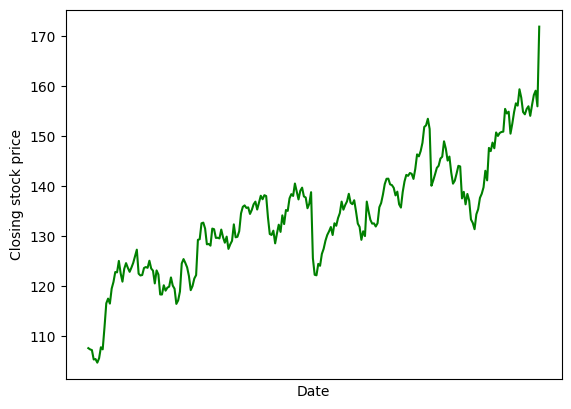

In [21]:
# date_str = '2023-02-28'
# date_format = '%Y-%m-%d'

# date_obj = datetime.strptime(date_str, date_format)
# print(type(date_obj))

# Now let's do some visualization:
fig, ax = plt.subplots()
ax.plot(df_reduced['Date'], df_reduced['Close'], 'g-')
ax.set_xlabel('Date')
ax.set_ylabel('Closing stock price')
plt.xticks([])

# timestamps = np.zeros(25)
# dates = df_reduced['Date'].to_numpy()
# for i in range(0, 250, 10):
  # timestamps[i] = dates[i]
# plt.xticks(np.arange(0, 250, 10), timestamps)

In [22]:
# Check for stationarity:
ADF_result = adfuller(df_reduced['Close'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
print('------------------')
# Process is not stationary, so before checking whether it is a random walk,
# we should apply first-order differencing. P-value is to crucial and
# ADF-stat is not a large negative number. Applying 1st order diff.:

close_diff = np.diff(df_reduced['Close'], n=1)
ADF_result = adfuller(close_diff)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
# after differencing we got a stationary process

ADF Statistic: -0.9061070589891305
p-value: 0.7859546229776926
------------------
ADF Statistic: -14.852726494151623
p-value: 1.7670778819245362e-27


In [23]:
print(close_diff.shape)
# but since the diff operator was applied,
# we are now dealing with reduced-size-data (minus 1)
# so we'll do the following trick (add '0' element at the beginning)

# those extra prints just to illustrate and to be absolutely sure:
print(close_diff[0:5])
close_diff = np.insert(close_diff, 0, 0)
print(close_diff[0:5])
print(close_diff.shape)

(251,)
[-0.25     -0.139999 -1.879997  0.090004 -0.720002]
[ 0.       -0.25     -0.139999 -1.879997  0.090004]
(252,)


In [24]:
# now append this as a new column to out dataframe
# for ease of future representation:
display(df_reduced)
df_reduced = pd.concat([df_reduced, pd.DataFrame(close_diff)], axis=1)
display(df_reduced)
# yup, everything as it should be :)

,Date,Close
0,2023-04-27,107.589996
1,2023-04-28,107.339996
2,2023-05-01,107.199997
3,2023-05-02,105.320000
4,2023-05-03,105.410004
...,...,...
247,2024-04-22,156.279999
248,2024-04-23,158.259995
249,2024-04-24,159.130005
250,2024-04-25,156.000000


,Date,Close,0
0,2023-04-27,107.589996,0.000000
1,2023-04-28,107.339996,-0.250000
2,2023-05-01,107.199997,-0.139999
3,2023-05-02,105.320000,-1.879997
4,2023-05-03,105.410004,0.090004
...,...,...,...
247,2024-04-22,156.279999,2.190003
248,2024-04-23,158.259995,1.979996
249,2024-04-24,159.130005,0.870010
250,2024-04-25,156.000000,-3.130005


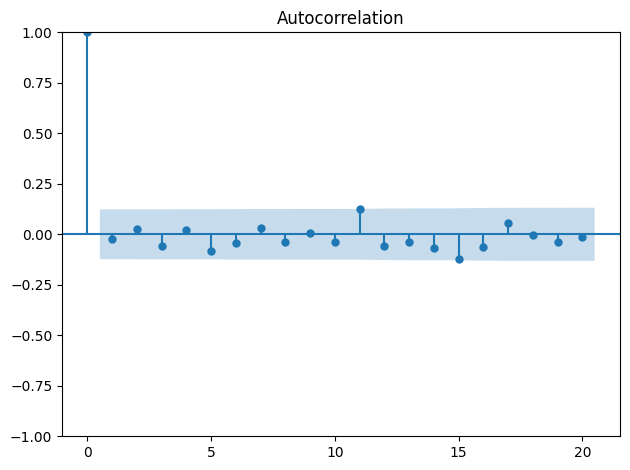

In [25]:
# Now in order to determine whether we have to plot acf function.
# There we need to check if all ac coeffs are in epsilon-region of zero,
# because it means that there is no autocorrelation between values and
# our process is a random walk, otherwise it is not.
df_reduced.rename(columns = {0:'Close_diff'}, inplace = True)
plot_acf(df_reduced['Close_diff'], lags=20)
plt.tight_layout()
# we can clearly see, that there are no significant ac coeffs after lag 0,
# which means that we are dealing here a random walk process.

In [27]:
# now let's do a train-test split (last 5 days -- test, all the others -- train):
train = df_reduced[:-5]
test = df_reduced[-5:]
# we'll make 2 surveys so to speak (we'll measure the stats for both:
# standard and differenced sets to examine differences we'll have):
train2 = df_reduced[:-5]
test2 = df_reduced[-5:]
display(train)
display(test)

,Date,Close,Close_diff
0,2023-04-27,107.589996,0.000000
1,2023-04-28,107.339996,-0.250000
2,2023-05-01,107.199997,-0.139999
3,2023-05-02,105.320000,-1.879997
4,2023-05-03,105.410004,0.090004
...,...,...,...
242,2024-04-15,154.860001,-2.869995
243,2024-04-16,154.399994,-0.460007
244,2024-04-17,155.470001,1.070007
245,2024-04-18,156.009995,0.539994


,Date,Close,Close_diff
247,2024-04-22,156.279999,2.190003
248,2024-04-23,158.259995,1.979996
249,2024-04-24,159.130005,0.870010
250,2024-04-25,156.000000,-3.130005
251,2024-04-26,171.949997,15.949997


In [28]:
# implementing baseline models as well as next timestamp forecast:
# historical mean:
historical_mean = np.mean(train['Close'])
test.loc[:, 'pred_mean'] = historical_mean
historical_mean_error = mean_squared_error(test['Close'], test['pred_mean'])

# last month-period's mean:
last_month_mean = np.mean(train['Close'][-30:])
test.loc[:, 'pred_last_mean'] = last_month_mean
last_mean_error = mean_squared_error(test['Close'], test['pred_last_mean'])

# last known value:
last_value = (train['Close'].to_numpy())[-1]
test.loc[:, 'pred_last_value'] = last_value
last_value_error = mean_squared_error(test['Close'], test['pred_last_value'])

# since there is no visible seasonality we won't apply naive seasonal method

# next timestamp forecast over test test:
next_values = np.zeros(5)
test_close = test['Close'].to_numpy()
next_values = np.roll(test_close, 1)
next_values[0] = (train['Close'].to_numpy())[-1]
next_value_error = mean_squared_error(test['Close'], next_values)

display(test)

,Date,Close,Close_diff,pred_mean,pred_last_mean,pred_last_value
247,2024-04-22,156.279999,2.190003,133.647247,150.252333,154.089996
248,2024-04-23,158.259995,1.979996,133.647247,150.252333,154.089996
249,2024-04-24,159.130005,0.870010,133.647247,150.252333,154.089996
250,2024-04-25,156.000000,-3.130005,133.647247,150.252333,154.089996
251,2024-04-26,171.949997,15.949997,133.647247,150.252333,154.089996


In [29]:
# MSE:
print(historical_mean_error) # the worst one
print(last_mean_error)
print(last_value_error)
print(next_value_error) # the best one (the least value)

746.8291909783242
136.61855210774505
74.04288930402143
54.73455006003178


([], [])

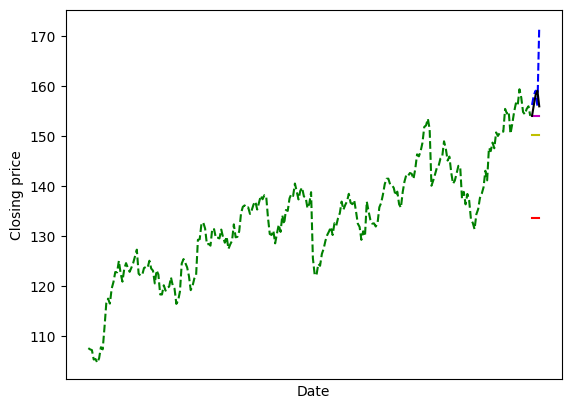

In [30]:
# Plots for predictions:
# visualisation:
fig, ax = plt.subplots()
ax.plot(train['Date'], train['Close'], 'g--')
ax.plot(test['Date'], test['Close'], 'b--')
ax.plot(test['Date'], test['pred_mean'], 'r-')
ax.plot(test['Date'], test['pred_last_mean'], 'y-')
ax.plot(test['Date'], test['pred_last_value'], 'm-')
ax.plot(test['Date'], next_values, 'k-')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price')
plt.xticks([])
# in case of standard set we got the following results.
# the nest model here is when we forecast the current value (it means,
# that for the next value we take the current one).
# The reason for that will be examined later on.

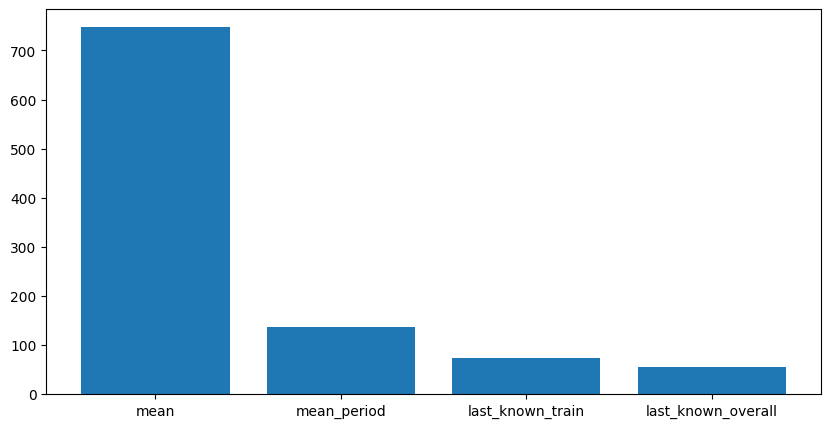

In [32]:
data = {'mean':historical_mean_error, # red graph
        'mean_period':last_mean_error, # yellow graph
        'last_known_train':last_value_error, # magenta graph
        'last_known_overall':next_value_error} # black graph
forecasts = list(data.keys())
mse = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(forecasts, mse)
plt.show()

# in our case the best result was shown by forecasting the next timestep
# over the test set using the last-known value, the worst one is historical mean,
# which can be easily explained by the fact that we have non-stationary process.

# Also worth mentioning is the fact that in our last timestamp we registred
# high growth of the closing price by comparison to the previous one (the gap
# is somewhere near 10-15 dollars from the last day and with these sudden growths,
# we may actually find out (in other occasions) that this method works worse,
# than the others).